# ## Question 1------------------------------------------------------------------------------------------------------------------


In [ ]:
Clustering is a type of unsupervised learning technique that involves grouping similar data points together based on certain criteria, without the
need for predefined labels. The goal of clustering is to partition the data into groups, or clusters, where data points within the same cluster are
more similar to each other than to those in other clusters. It helps reveal underlying patterns, structures, or relationships in the data.
Basic Concept of Clustering:

    Similarity Metric:
        Clustering algorithms use a similarity metric to measure the likeness or distance between data points. Common metrics include Euclidean 
        distance, cosine similarity, and Jaccard similarity.

    Grouping Criteria:
        The grouping criteria involve defining how clusters are formed. Different clustering algorithms use various approaches, such as partitioning, 
        hierarchical merging, or density-based clustering.

    No Predefined Labels:
        Unlike supervised learning, clustering does not require labeled training data. It discovers patterns or structures in the data based on
        inherent similarities.

    Unsupervised Learning:
        Clustering is considered an unsupervised learning task since it does not involve predicting labels but focuses on grouping similar 
        data points.

Examples of Applications:

    Customer Segmentation:
        Identify groups of customers with similar purchasing behavior, allowing businesses to tailor marketing strategies to specific 
        customer segments.

    Image Segmentation:
        Segment images based on color, texture, or other features, aiding in object recognition and computer vision tasks.

    Anomaly Detection:
        Identify unusual patterns or outliers in data, such as detecting fraudulent transactions in finance or identifying defective 
        products in manufacturing.

    Document Clustering:
        Group similar documents together, simplifying document retrieval, summarization, and topic modeling.

    Genomic Data Analysis:
        Cluster genes based on expression patterns to identify functional relationships, genetic pathways, or associations with diseases.

    Social Network Analysis:
        Group individuals with similar interests or behaviors in social networks, facilitating targeted recommendations or community detection.

Code Example (K-Means Clustering):

Here's a simple example using Python and scikit-learn to apply K-Means clustering:

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


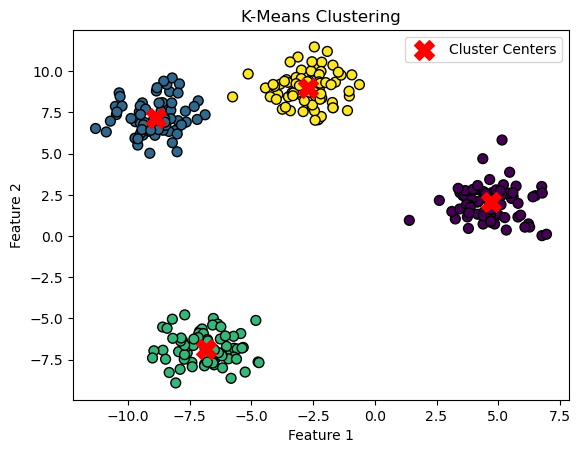

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X)

# Plot the data points with cluster assignments
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', edgecolor='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


## Qestion 2 --------------------------------------------------------------------------------------------------------------

In [ ]:
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a density-based clustering algorithm that can discover clusters of 
varying shapes and sizes in a dataset. Unlike k-means and hierarchical clustering, DBSCAN does not require specifying the number of clusters 
beforehand and is effective in identifying clusters with irregular shapes.
Key Characteristics of DBSCAN:

    Density-Based:
        DBSCAN defines clusters as dense regions of data points separated by sparser regions. It doesn't assume a globular shape for clusters.

    Noise Tolerance:
        DBSCAN is capable of identifying and marking noise or outliers, which are data points that do not belong to any cluster.

    No Predefined Number of Clusters:
        Unlike k-means, DBSCAN does not require specifying the number of clusters in advance. It can discover the optimal number of clusters 
        based on the density of the data.

    Variable Cluster Shapes:
        DBSCAN can find clusters of different shapes and sizes. It is particularly useful in scenarios where clusters may have non-convex shapes.

Differences from K-Means and Hierarchical Clustering:

    Cluster Shape:
        K-Means assumes that clusters are spherical and equally sized. Hierarchical clustering can also struggle with irregularly shaped clusters. 
        In contrast, DBSCAN is more flexible and can handle clusters of arbitrary shapes.

    Number of Clusters:
        K-Means requires specifying the number of clusters beforehand, and hierarchical clustering produces a hierarchy that may require cutting to 
        determine the number of clusters. DBSCAN, on the other hand, automatically identifies the number of clusters based on data density.

    Noise Handling:
        DBSCAN explicitly identifies noise points (outliers) as data points that do not belong to any cluster. K-Means and hierarchical clustering
        may assign all data points to clusters, even if they do not represent meaningful patterns.

Code Example:

Let's demonstrate DBSCAN using Python and scikit-learn:

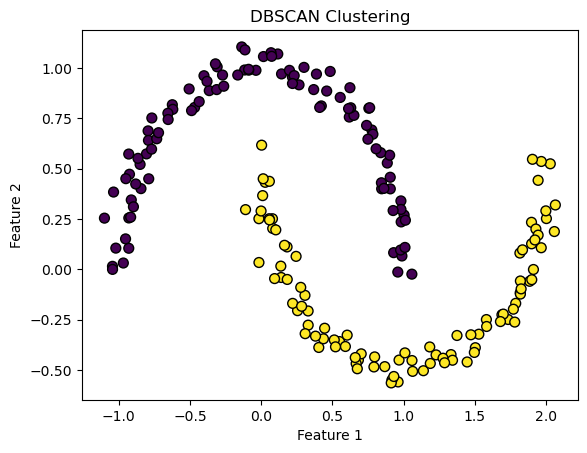

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# Generate synthetic data with two moons
X, _ = make_moons(n_samples=200, noise=0.05, random_state=42)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)
clusters = dbscan.fit_predict(X)

# Plot the data points with cluster assignments
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', edgecolor='k', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


## Qestion 3 --------------------------------------------------------------------------------------------------------------

In [ ]:
Determining the optimal values for the eps (maximum distance between two samples for one to be considered in the neighborhood of the other) and 
min_samples (minimum number of samples required to form a dense region) parameters in DBSCAN clustering can be crucial for achieving meaningful results.
Several methods can help in choosing appropriate values:
Visual Inspection:

    Visualize Data:
        Plot the data points and visually inspect the density of the clusters. Look for natural gaps between clusters and try to estimate
        
        the appropriate eps value.

    Elbow Method:
        Plot the sorted distance to the k-th nearest neighbor for each data point. The elbow point in the graph can give an indication of the optimal
        eps value.

K-Distance Plot:

    K-Distance Plot:
        Calculate the k-distance plot for different values of k. The point where the rate of change in distance slows down may indicate the optimal
        eps value.

Code Example:

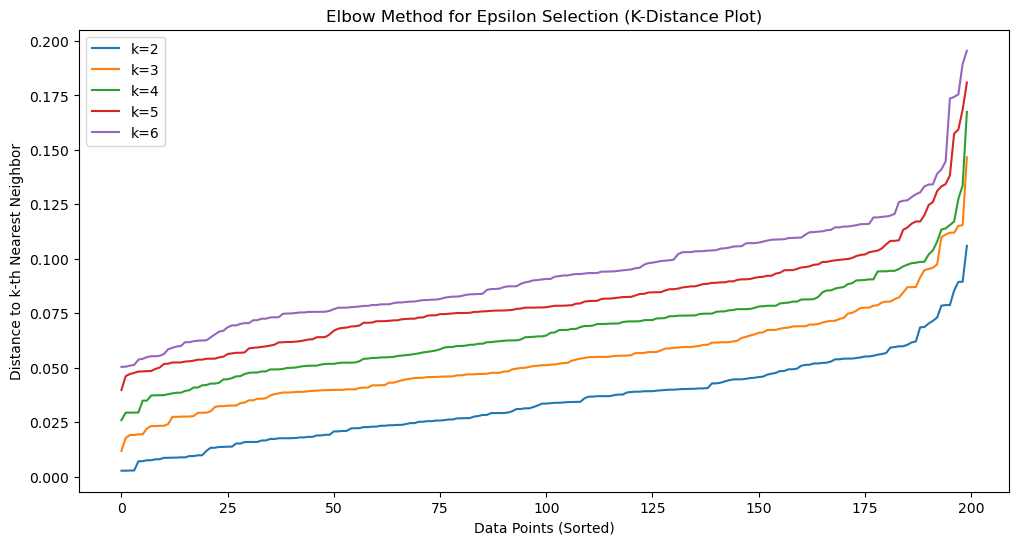

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Generate synthetic data with two moons
np.random.seed(42)
X = np.random.rand(200, 2)

# Calculate distances to the k-th nearest neighbor
k_values = [2, 3, 4, 5, 6]
distances = []

for k in k_values:
    neighbors = NearestNeighbors(n_neighbors=k)
    neighbors.fit(X)
    distances_k = neighbors.kneighbors(X)[0][:, -1]
    distances.append(np.sort(distances_k))

# Plot the elbow method
plt.figure(figsize=(12, 6))
for i in range(len(k_values)):
    plt.plot(np.arange(len(X)), distances[i], label=f'k={k_values[i]}')

plt.title('Elbow Method for Epsilon Selection (K-Distance Plot)')
plt.xlabel('Data Points (Sorted)')
plt.ylabel('Distance to k-th Nearest Neighbor')
plt.legend()
plt.show()


## Qestion 4 --------------------------------------------------------------------------------------------------------------

In [ ]:
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is effective in handling outliers in a dataset. DBSCAN explicitly identifies
and labels data points that do not belong to any cluster as noise points or outliers. This is achieved by designating data points that are not part 
of any dense region as outliers. The algorithm identifies clusters as regions of higher point density separated by regions of lower density.
Handling Outliers in DBSCAN:

    Core Points:
        Core points are data points that have at least min_samples points within a distance of eps. These points are considered part of a dense region.

    Border Points:
        Border points are within the neighborhood of a core point but do not have enough neighbors to be considered a core point. Border points can 
        be part of a cluster but are not as densely connected as core points.

    Noise Points (Outliers):
        Noise points are neither core nor border points. They do not belong to any dense region and are considered outliers.

Code Example:

Let's demonstrate how DBSCAN handles outliers using Python and scikit-learn

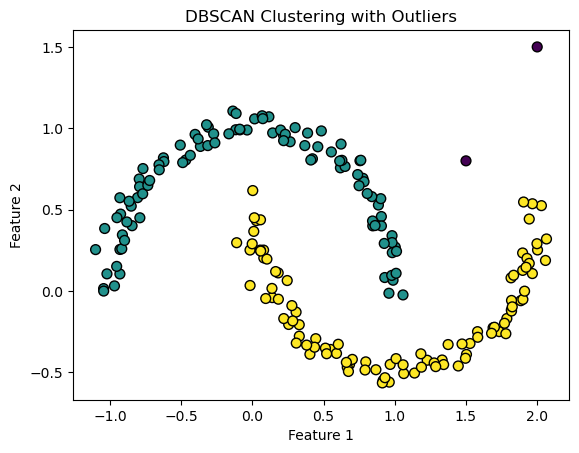

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# Generate synthetic data with two moons and outliers
X, _ = make_moons(n_samples=200, noise=0.05, random_state=42)
outliers = np.array([[2, 1.5], [1.5, 0.8]])
X = np.vstack([X, outliers])

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)
clusters = dbscan.fit_predict(X)

# Plot the data points with cluster assignments
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', edgecolor='k', s=50)
plt.title('DBSCAN Clustering with Outliers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [ ]:
In this example, make_moons is used to generate synthetic data with two moon-shaped clusters and outliers. DBSCAN is applied with specified parameters
(eps and min_samples). The resulting clusters and outliers are visualized using a scatter plot. Outliers, which do not belong to any cluster, are marked
accordingly. DBSCAN is effective in handling outliers by explicitly considering them as noise points during the clustering process.

## Qestion 5 --------------------------------------------------------------------------------------------------------------

In [ ]:
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) and k-means clustering are two distinct clustering algorithms with 
fundamental differences in their approach to grouping data points into clusters. Here are some key differences:
1. Cluster Shape and Size:

    DBSCAN:
        Can identify clusters of arbitrary shapes and sizes. It is not limited to spherical or convex shapes.
        Clusters can have varying densities, and clusters can be interconnected or have irregular shapes.

    K-Means:
        Assumes that clusters are spherical and isotropic. It is sensitive to the initial placement of cluster centroids.
        Clusters are assumed to have similar shapes and sizes.

2. Number of Clusters:

    DBSCAN:
        Does not require specifying the number of clusters in advance. It automatically identifies the number of clusters based on data density.
        Can handle datasets with varying cluster densities.

    K-Means:
        Requires specifying the number of clusters (k) before running the algorithm.
        Sensitivity to the choice of k can impact the quality of clustering.

3. Treatment of Outliers:

    DBSCAN:
        Explicitly identifies and labels outliers as noise points. It can handle outliers effectively by not assigning them to any cluster.

    K-Means:
        Assigns every data point to one of the k clusters, including outliers. Outliers may affect the centroids and cluster assignments.

4. Scalability:

    DBSCAN:
        Performs well with large datasets but can be sensitive to the choice of parameters (eps and min_samples).

    K-Means:
        May struggle with high-dimensional or large datasets due to its sensitivity to the number of dimensions.

Code Example:

Let's illustrate the differences using a simple example with synthetic data:

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


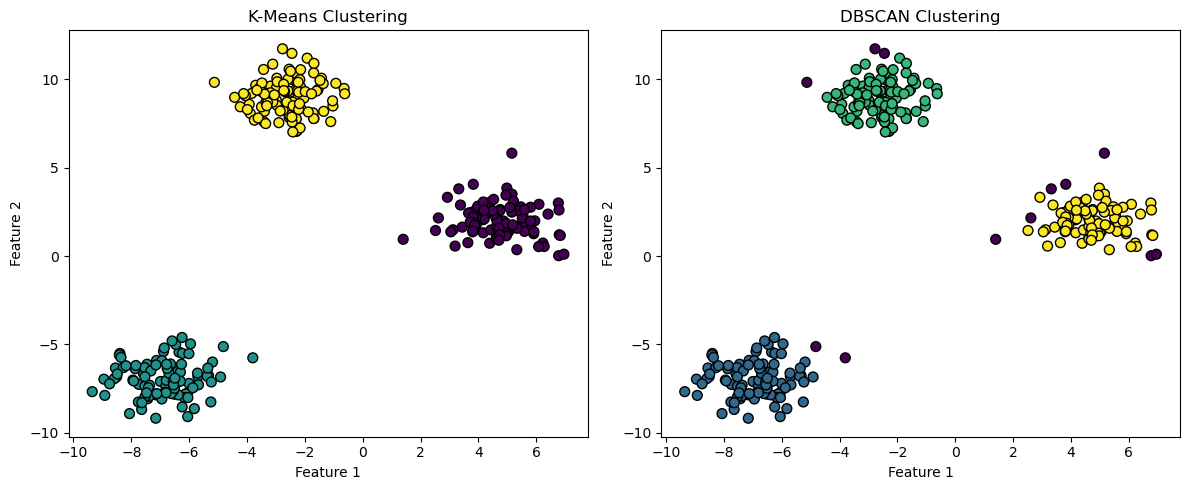

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, DBSCAN

# Generate synthetic data with three blobs
X, _ = make_blobs(n_samples=300, centers=3, random_state=42)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_clusters = kmeans.fit_predict(X)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.8, min_samples=5)
dbscan_clusters = dbscan.fit_predict(X)

# Plot the data points with cluster assignments for both algorithms
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_clusters, cmap='viridis', edgecolor='k', s=50)
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=dbscan_clusters, cmap='viridis', edgecolor='k', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()


In [ ]:
In this example, synthetic data with three blobs is generated. K-Means and DBSCAN are applied, and the resulting clusters are visualized. 
Notice how DBSCAN can handle clusters with arbitrary shapes and sizes, while K-Means assumes spherical clusters and may struggle with irregularly shaped clusters.

## Qestion 6 --------------------------------------------------------------------------------------------------------------

In [ ]:
Yes, DBSCAN clustering can be applied to datasets with high-dimensional feature spaces. However, applying DBSCAN to high-dimensional data 
comes with some challenges, and the choice of parameters becomes critical. High-dimensional spaces can exhibit properties such as the curse of 
dimensionality, where the notion of distance becomes less meaningful and density differences may be less pronounced.
Challenges and Considerations:

    Curse of Dimensionality:
        In high-dimensional spaces, the concept of density becomes less meaningful, and all points may appear to be in a sparse region.
        This can lead to difficulties in defining an appropriate eps (neighborhood radius).

    Parameter Sensitivity:
        DBSCAN is sensitive to the choice of parameters, especially eps and min_samples. Selecting appropriate values becomes challenging 
        in high-dimensional spaces.

    Dimensionality Reduction:
        Dimensionality reduction techniques (e.g., PCA) can be applied before clustering to address the curse of dimensionality and capture
        the most important features.

    Interpretability:
        Visualizing clusters in high-dimensional space is challenging. Understanding and interpreting clusters become more complex as the number
        of dimensions increases.

Code Example:

Let's illustrate applying DBSCAN to high-dimensional data using synthetic data with a higher number of features:

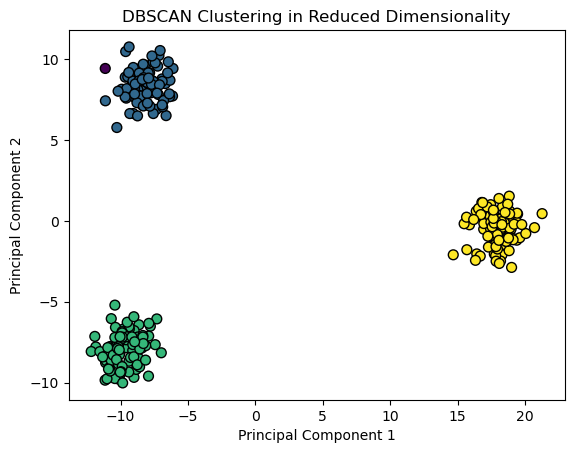

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# Generate synthetic high-dimensional data with three blobs
X, _ = make_blobs(n_samples=300, n_features=10, centers=3, random_state=42)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Apply DBSCAN clustering on reduced-dimensional data
dbscan = DBSCAN(eps=1.5, min_samples=5)
clusters = dbscan.fit_predict(X_pca)

# Plot the data points with cluster assignments
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', edgecolor='k', s=50)
plt.title('DBSCAN Clustering in Reduced Dimensionality')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [ ]:
In this example, synthetic high-dimensional data with ten features is generated. PCA is applied for dimensionality reduction to visualize the 
data in two dimensions. DBSCAN is then applied to the reduced-dimensional data, and the resulting clusters are visualized. Keep in mind that adjusting
parameters (eps and min_samples) for high-dimensional data may require experimentation, and additional techniques such as dimensionality reduction can
be beneficial.

## Qestion 7 --------------------------------------------------------------------------------------------------------------

In [ ]:
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is well-suited for handling clusters with varying densities.
One of the key strengths of DBSCAN is its ability to identify clusters based on local density differences. 
The algorithm can find clusters of different shapes and sizes, and it doesn't require specifying the number of clusters in advance.
Key Aspects of DBSCAN Handling Varying Densities:

    Core Points and Density Reachability:
        DBSCAN identifies core points as data points with at least min_samples points within a distance of eps. These core points form the dense
        regions of clusters.
        Density reachability allows the algorithm to extend clusters by connecting core points that are within each other's eps neighborhoods.

    Border Points:
        Border points are within the neighborhood of a core point but do not have enough neighbors to be considered a core point.
        These points can be part of a cluster but are not as densely connected.

    Clusters with Different Densities:
        DBSCAN can handle clusters with varying densities because it does not rely on a fixed distance threshold for all clusters.
        Instead, it adapts to local density variations.

Code Example:

Let's illustrate how DBSCAN handles clusters with varying densities using synthetic data:

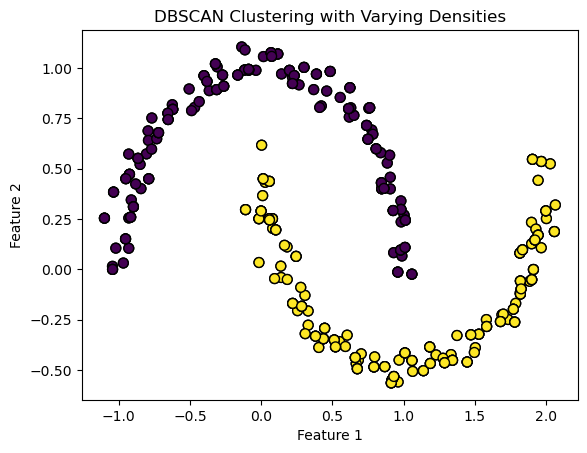

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# Generate synthetic data with two moons and varying densities
X, _ = make_moons(n_samples=200, noise=0.05, random_state=42)

# Introduce varying densities by duplicating points in one moon
X_high_density = np.vstack([X[:100], X[:100], X[100:], X[100:], X[100:], X[100:]])

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)
clusters = dbscan.fit_predict(X_high_density)

# Plot the data points with cluster assignments
plt.scatter(X_high_density[:, 0], X_high_density[:, 1], c=clusters, cmap='viridis', edgecolor='k', s=50)
plt.title('DBSCAN Clustering with Varying Densities')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


## Qestion 8 --------------------------------------------------------------------------------------------------------------

In [ ]:
Evaluating the quality of DBSCAN clustering results can be done using various metrics. However, it's important to note that traditional clustering
evaluation metrics, such as precision and recall, may not be directly applicable to DBSCAN because it doesn't produce a fixed number of clusters, and its clusters can have different shapes and sizes. Instead, evaluation often involves assessing the algorithm's ability to capture the underlying structure of the data, such as density-based metrics.
Common Evaluation Metrics for DBSCAN:

    Silhouette Score:
        Measures how well-separated clusters are. The silhouette score ranges from -1 to 1, where a higher score indicates better-defined clusters.

    Calinski-Harabasz Index:
        Measures the ratio of between-cluster variance to within-cluster variance. A higher index suggests better-defined clusters.

    Davies-Bouldin Index:
        Measures the compactness and separation between clusters. A lower Davies-Bouldin index indicates better clustering.

    Adjusted Rand Index (ARI):
        Measures the similarity between true and predicted clusterings, adjusted for chance. Scores range from -1 to 1, where a higher score indicates
        better agreement.

    Homogeneity, Completeness, and V-measure:
        These metrics assess the purity of the clusters. Homogeneity measures how well each cluster contains only members of a single class, completeness measures how well all members of a class are assigned to the same cluster, and V-measure is the harmonic mean of homogeneity and completeness.

Code Example:

Let's demonstrate the use of Silhouette Score, Calinski-Harabasz Index, and Davies-Bouldin Index for evaluating DBSCAN clustering using Python and 
scikit-learn:

python

In [23]:
import numpy as np
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Generate synthetic data with two moons
X, _ = make_moons(n_samples=200, noise=0.05, random_state=42)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)
clusters = dbscan.fit_predict(X)

# Evaluate clustering using metrics
silhouette = silhouette_score(X, clusters)
calinski_harabasz = calinski_harabasz_score(X, clusters)
davies_bouldin = davies_bouldin_score(X, clusters)

# Print evaluation metrics
print(f'Silhouette Score: {silhouette:.4f}')
print(f'Calinski-Harabasz Index: {calinski_harabasz:.4f}')
print(f'Davies-Bouldin Index: {davies_bouldin:.4f}')
In this example, DBSCAN is applied to synthetic data with two moons, and three commonly used metrics (Silhouette Score, Calinski-Harabasz Index, 
and Davies-Bouldin Index) are calculated to assess the quality of the clustering results. These metrics provide a quantitative evaluation of the 
clustering performance. Keep in mind that theappropriateness of a metric depends on the characteristics of the data and the specific goals of the 
clustering task.


Silhouette Score: 0.3224
Calinski-Harabasz Index: 127.2348
Davies-Bouldin Index: 1.1760


## Qestion 9 --------------------------------------------------------------------------------------------------------------

In [ ]:
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is primarily an unsupervised learning algorithm designed for clustering.
It doesn't inherently incorporate labeled information for training. However, you can use the clustering results obtained by DBSCAN as part of 
a semi-supervised learning pipeline.

Here's a general approach to integrate DBSCAN clustering into a semi-supervised learning task:

    Cluster Assignment:
        Apply DBSCAN to the unlabeled dataset to obtain cluster assignments.

    Label Propagation:
        Assign labels to the data points within each cluster based on some criterion (e.g., majority class within the cluster).

    Train a Classifier:
        Use the labeled data, including both originally labeled instances and instances labeled through clustering, to train a classifier.

    Predict Labels:
        Apply the trained classifier to predict labels for new or unlabeled instances.

Code Example:

Let's illustrate a simplified semi-supervised learning scenario using Python and scikit-learn:

In [24]:
import numpy as np
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate synthetic data with two moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=42)

# Simulate a semi-supervised scenario (assume only a small portion is labeled)
X_train, X_unlabeled, y_train, y_unlabeled = train_test_split(X, y, test_size=0.8, random_state=42)

# Apply DBSCAN clustering to the unlabeled data
dbscan = DBSCAN(eps=0.3, min_samples=5)
clusters = dbscan.fit_predict(X_unlabeled)

# Simulate label propagation (assign majority class within each cluster)
for cluster_label in np.unique(clusters):
    mask = (clusters == cluster_label)
    majority_class = np.bincount(y_unlabeled[mask]).argmax()
    y_unlabeled[mask] = majority_class

# Combine labeled and pseudo-labeled data
X_combined = np.vstack([X_train, X_unlabeled])
y_combined = np.concatenate([y_train, y_unlabeled])

# Train a classifier (Random Forest as an example)
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_combined, y_combined)

# Predict labels for the entire dataset
y_pred = classifier.predict(X)

# Evaluate the accuracy
accuracy = accuracy_score(y, y_pred)
print(f'Accuracy: {accuracy:.4f}')


Accuracy: 1.0000


## Qestion 10  --------------------------------------------------------------------------------------------------------------

In [ ]:
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is designed to handle noise in datasets effectively due to its 
explicit identification of noise points. Noise points are data points that do not belong to any cluster, and DBSCAN labels them accordingly. 
Additionally, DBSCAN can handle datasets with missing values to some extent, but it may require careful consideration and preprocessing.
Handling Noise:

DBSCAN identifies noise points during clustering and marks them as outliers. This is achieved by designating points that do not have the 
minimum number of neighbors within a specified distance (min_samples) as noise.
Handling Missing Values:

DBSCAN can handle datasets with missing values to some extent, but the treatment of missing values depends on the specific implementation. 
In scikit-learn's implementation, missing values are treated as distinct values and are considered during distance calculations. However, other
implementations may have different approaches.
Code Example:

Let's demonstrate how DBSCAN handles noise and how it can handle datasets with missing values using synthetic data:

In [ ]:
import numpy as np
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# Generate synthetic data with two moons and introduce noise
X, _ = make_moons(n_samples=200, noise=0.05, random_state=42)
noise_points = np.array([[1.5, 0.8], [1.7, 0.9], [1.6, 0.7]])
X_with_noise = np.vstack([X, noise_points])

# Introduce missing values (replace some points with NaN)
X_with_missing = X_with_noise.copy()
X_with_missing[10:15, :] = np.nan

# Apply DBSCAN clustering with missing values
dbscan = DBSCAN(eps=0.3, min_samples=5)
clusters = dbscan.fit_predict(X_with_missing)

# Print noise points (cluster label -1)
print(f'Noise Points: {np.sum(clusters == -1)}')

# Print cluster assignments (excluding noise points)
print(f'Cluster Assignments: {np.unique(clusters[clusters != -1])}')


## Qestion 11 --------------------------------------------------------------------------------------------------------------

In [ ]:
Certainly! Below is a simple implementation of the DBSCAN algorithm in Python. We'll use the scikit-learn's make_moons function to generate a synthetic dataset with two moons, apply the DBSCAN algorithm, and visualize the clustering results.

In [ ]:
In this example, synthetic data is generated with one outlier. The hierarchical clustering dendrogram is plotted, and a threshold is set to
identify clusters. The clusters are assigned using the fcluster function, and outliers are identified based on their cluster assignments. 
The outliers are then highlighted in the dendrogram.

Remember to adjust the threshold based on the characteristics of your data and the dendrogram. Lower thresholds may result in more outliers 
being identified, while higher thresholds may miss some outliers. The choice of the threshold is often a trade-off between sensitivity and 
specificity in outlier detection.